In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from passive_agressive_classic_update import passive_agressive_online

# Importing dataset

In [3]:
# For the testing, we use the Haberman's dataset
haberman = pd.read_csv("../datasets/haberman/haberman.data", header=None, 
                       names=["age", "year_of_operation", "number_of_nodes", "status"])
haberman

,age,year_of_operation,number_of_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [4]:
# Separating the data from the labels
y = haberman["status"]
X = haberman.drop("status", axis=1).values
X

array([[30, 64,  1],
       [30, 62,  3],
       [30, 65,  0],
       [31, 59,  2],
       [31, 65,  4],
       [33, 58, 10],
       [33, 60,  0],
       [34, 59,  0],
       [34, 66,  9],
       [34, 58, 30],
       [34, 60,  1],
       [34, 61, 10],
       [34, 67,  7],
       [34, 60,  0],
       [35, 64, 13],
       [35, 63,  0],
       [36, 60,  1],
       [36, 69,  0],
       [37, 60,  0],
       [37, 63,  0],
       [37, 58,  0],
       [37, 59,  6],
       [37, 60, 15],
       [37, 63,  0],
       [38, 69, 21],
       [38, 59,  2],
       [38, 60,  0],
       [38, 60,  0],
       [38, 62,  3],
       [38, 64,  1],
       [38, 66,  0],
       [38, 66, 11],
       [38, 60,  1],
       [38, 67,  5],
       [39, 66,  0],
       [39, 63,  0],
       [39, 67,  0],
       [39, 58,  0],
       [39, 59,  2],
       [39, 63,  4],
       [40, 58,  2],
       [40, 58,  0],
       [40, 65,  0],
       [41, 60, 23],
       [41, 64,  0],
       [41, 67,  0],
       [41, 58,  0],
       [41, 5

In [6]:
# Changing the labels domain from {1, 2} to {-1, 1}
# Necessary to match the logic of the passive agressive online algorithm
y[y==1] = -1
y[y==2] = 1
y

0     -1
1     -1
2     -1
3     -1
4     -1
5     -1
6     -1
7     -1
8     -1
9     -1
10    -1
11    -1
12    -1
13    -1
14    -1
15    -1
16    -1
17    -1
18    -1
19    -1
20    -1
21    -1
22    -1
23    -1
24    -1
25    -1
26    -1
27    -1
28    -1
29    -1
      ..
276   -1
277   -1
278   -1
279   -1
280   -1
281   -1
282   -1
283   -1
284   -1
285   -1
286   -1
287   -1
288   -1
289   -1
290   -1
291   -1
292   -1
293   -1
294   -1
295   -1
296   -1
297   -1
298   -1
299   -1
300   -1
301   -1
302   -1
303   -1
304   -1
305   -1
Name: status, Length: 306, dtype: int64

## Passive Agressive Online Learning

In [11]:
def accuracy(X, weight_vector):
    y_pred = np.sign(np.dot(X, weight_vector))
    correctness_vector = np.zeros(len(y))
    correctness_vector[y==y_pred] = 1
    accuracy = sum(correctness_vector) / len(y)
    return accuracy

### Classic update

In [13]:
w_classic = passive_agressive_online(X, y, impl="classic")
w_classic

array([-0.00639608, -0.01358067, -0.00023109])

In [14]:
# Mesuring the accuracy of this classic model
accuracy(X, w_classic)

1.0

In [ ]:
# Mesuring the running time
import timeit

timeit.timeit('w_classic = passive_agressive_online(X, y, impl="classic")', globals=globals())

### First relaxation

In [26]:
w_relax1 = passive_agressive_online(X, y, impl="relax1", C = 10**-7)
w_relax1

array([-7.356e-04, -9.055e-04, -2.400e-06])

In [27]:
# Accuracy of the first relaxation model
accuracy(X, w_relax1)

0.7352941176470589

### Second relaxation

In [29]:
w_relax2 = passive_agressive_online(X, y, impl="relax2", C = 10**-7)
w_relax2

array([-1.16554032e-03, -1.48123846e-03,  1.46889207e-05])

In [30]:
accuracy(X, w_relax2)

0.7352941176470589

As you might have noticed, the classic update obtains poor results. For relatively not too high value of *C* for first and second relaxation (*C=1, 2 and even down to 0.0001*), the first and second relaxation outputs results are pretty close to the ones of the classic update.
However, as *C* becomes infinitely small, the accuracy of the model increases drastically

## Plotting C against accuracy for first and second relaxation

In [56]:
C = [10**-i for i in range(24, -15, -1)]
k = len(C)
accuracies = np.zeros(k)
C

[1e-24,
 1e-23,
 1e-22,
 1e-21,
 1e-20,
 1e-19,
 1e-18,
 1e-17,
 1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000,
 10000000000,
 100000000000,
 1000000000000,
 10000000000000,
 100000000000000]

### First relaxation

In [57]:
for i in range(k):
    w_relax1 = passive_agressive_online(X, y, "relax1", C[i])
    accuracies[i] = accuracy(X, w_relax1)
accuracies

array([0.73529412, 0.73529412, 0.73529412, 0.73529412, 0.73529412,
       0.73529412, 0.73529412, 0.73529412, 0.73529412, 0.73529412,
       0.73529412, 0.73529412, 0.73529412, 0.73529412, 0.73529412,
       0.73529412, 0.73529412, 0.73529412, 0.73529412, 0.73529412,
       0.26470588, 0.26470588, 0.26470588, 0.26470588, 0.26470588,
       0.26470588, 0.26470588, 0.26470588, 0.26470588, 0.26470588,
       0.26470588, 0.26470588, 0.26470588, 0.26470588, 0.26470588,
       0.26470588, 0.26470588, 0.26470588, 0.26470588])

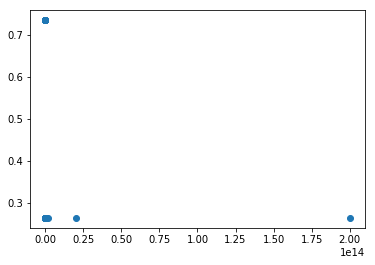

In [55]:
# TODO: instead, plot a bar chart to make it visible that 
# they are only two possible values for the error
plt.plot(C, accuracies, 'o')
plt.show()

### Second relaxation

In [58]:
for i in range(k):
    w_relax2 = passive_agressive_online(X, y, "relax2", C[i])
    accuracies[i] = accuracy(X, w_relax2)
accuracies

array([0.73529412, 0.73529412, 0.73529412, 0.73529412, 0.73529412,
       0.73529412, 0.73529412, 0.73529412, 0.73529412, 0.73529412,
       0.73529412, 0.73529412, 0.73529412, 0.73529412, 0.73529412,
       0.73529412, 0.73529412, 0.73529412, 0.73529412, 0.73202614,
       0.26470588, 0.26470588, 0.26470588, 0.26470588, 0.26470588,
       0.26470588, 0.26470588, 0.26470588, 0.26470588, 0.26470588,
       0.26470588, 0.26470588, 0.26470588, 0.26470588, 0.26470588,
       0.26470588, 0.26470588, 0.26470588, 0.26470588])

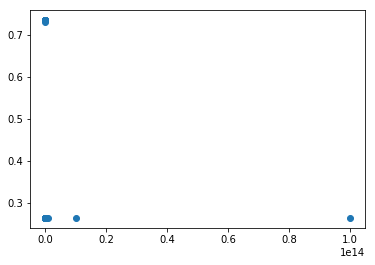

In [59]:
# TODO: instead, plot a bar chart to make it visible that 
# they are only two possible values for the error
plt.plot(C, accuracies, 'o')
plt.show()

In [60]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the  appearance. Line properties and *fmt* can be mixed.
    The following two calls yield identical resu